## PCA란?
- 데이터 집합 내에 존재하는 각 데이터의 차이를 가장 잘 나타내 주는 요소를 찾아내는 방법
- 통계 데이터 분석(주성분 찾기), 데이터 압축(차원감소), 노이즈 제거 등 다양한 분야에서 사용

### 간단한 PCA의 개념
- 차원축소와 변수추출 기법으로 널리 쓰이고 있는 주성분 분석
- PCA는 데이터의 분산을 최대한 보존하면서 서로 직교하는 새 기저(축)를 찾아,
- 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간으로 변환하는 기법
- 변수추출은 기존 변수를 조합해 새로운 변수를 만드는 기법(변수선택과 구분할 것)
- 데이터를 어떤 벡터에 정사영시켜 차원을 낮출 수 있음

### 벡터를 이용해서 데이터를 다시 표현하기
- 데이터를 변환시켰을 때, 어떤 벡터를 선정하면 본래 데이터 구조를 가장 잘 유지할 수 있을까
- 데이터를 새로운 축으로 표현하는 것
- 차원이 많은 경우 간단하게 표현해 볼 수 있다

### sklearn을 통한 간단한 실습

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

rng = np.random.RandomState(13)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X.shape

(200, 2)

In [5]:
rng.rand(2, 2) # 2x2로 0~1사이의 있는 값

array([[0.60735693, 0.79695268],
       [0.81266616, 0.26598051]])

In [6]:
rng.randn(2, 200) # 표준편차가 1이고 평균이 0인 표준정규분포를 따르는 숫자를 2x200으로 나타냄

array([[-2.23305285e+00,  1.42026788e-01,  7.42047827e-01,
         1.11144113e+00,  4.49767208e-01, -1.43039670e+00,
         9.42539772e-01, -5.35146593e-01, -4.58967168e-01,
         1.15152877e+00, -1.97741771e+00,  2.23864876e+00,
         9.00084997e-01,  8.89032373e-01, -1.52296574e-01,
         7.04626895e-01,  6.12955068e-01,  2.39663182e-01,
        -1.51202147e+00,  4.44697716e-01,  2.53220525e-01,
         9.40787068e-01,  4.17302320e-01,  2.69558553e-01,
         1.68721062e-01, -1.48895017e+00, -1.85526666e+00,
        -1.10321722e-01, -7.04604762e-01,  4.55318527e-01,
        -1.22067190e+00, -5.65046518e-01,  7.06188812e-01,
         5.04389807e-03, -8.73259179e-01,  5.56018081e-01,
         2.67381976e-01, -1.03193483e+00, -6.35903189e-01,
         1.99779097e-01, -1.96516643e-01, -2.64890894e-01,
        -5.36168707e-01, -2.69395632e+00,  4.81339952e-01,
         3.08090862e-01, -1.37528268e-01, -1.80036570e+00,
        -4.19985810e-01, -2.85337341e-02, -2.31813179e-0

In [7]:
rng.randn(2, 200).T # 표준편차가 1이고 평균이 0인 표준정규분포를 따르는 숫자를 2x200으로 나타냄

array([[ 1.74093381e+00, -1.43940416e+00],
       [-2.03556416e+00,  4.39235220e-01],
       [-1.10286680e+00, -8.56274023e-02],
       [-4.55992484e-01,  7.81481590e-01],
       [-1.68755874e+00, -8.61868294e-01],
       [-1.78079155e+00,  6.43537347e-01],
       [ 3.10432387e-01,  1.94388894e-01],
       [-1.77600407e+00, -5.12564016e-01],
       [-8.13020952e-01,  3.66614246e-02],
       [ 7.97672569e-01, -9.54693012e-01],
       [ 1.14090912e+00, -2.16382945e-01],
       [-3.84499409e-01, -1.35226910e-01],
       [ 7.10041699e-01, -1.91340203e-01],
       [ 7.72488744e-01,  1.53015281e-01],
       [ 5.33135953e-01,  5.88675382e-01],
       [-2.92686050e-01, -1.19804100e+00],
       [-9.82758511e-01,  3.25478741e-01],
       [-1.44702165e+00, -2.37210154e+00],
       [ 1.39744027e+00, -1.17303018e+00],
       [ 5.03103793e-01,  2.02395495e+00],
       [-1.57134056e-01,  6.40627279e-01],
       [-9.24177706e-02, -1.05551523e-01],
       [ 7.65631513e-01,  2.46529443e+00],
       [ 9.

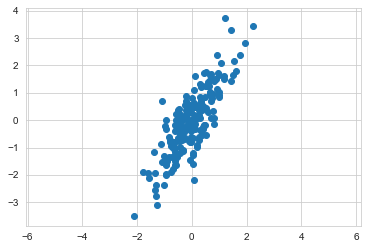

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal'); # 두 축을 같은 간격으로 나타내라

#### fit

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=13) # 2개의 주성분
pca.fit(X)

PCA(n_components=2, random_state=13)

#### 벡터와 분산값

In [13]:
pca.components_ # X를 설명하는 2개의 벡터 -> 두개의 주성분이기 때문

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [14]:
pca.explained_variance_ # 2개의 벡터에 대해 가지는 설명력

array([1.82531406, 0.13209947])

In [15]:
pca.explained_variance_ratio_ # 첫번째 요소가 데이터 전체를 93%, 두번째 요소는 6%로 설명을 하고 있다.

array([0.93251326, 0.06748674])

In [21]:
pca.mean_ # 좌표의 원점 -> 데이터의 중심

array([-0.03360413, -0.03527382])

#### 주성분 벡터를 시각화

In [19]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca() # ax=None -> plt.gca()
    arrowprops = dict(arrowstyle='->',
                     linewidth=2, color='black',
                     shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

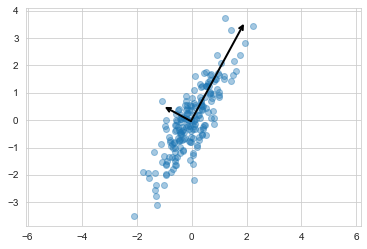

In [20]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()

#### 데이터의 주성분을 찾은 다음 주축을 변경하는 것도 가능

#### 이번에는 n_components를 1로 두고

In [23]:
pca = PCA(n_components=1, random_state=13)
pca.fit(X)
X_pca = pca.transform(X)

print(pca.components_)
print(pca.explained_variance_)
print(pca.mean_)

[[0.47802511 0.87834617]]
[1.82531406]
[-0.03360413 -0.03527382]


In [24]:
X_pca

array([[-2.95245605e-01],
       [ 5.81990204e-01],
       [ 4.94740664e-01],
       [ 3.90158943e+00],
       [ 2.03180114e+00],
       [-2.37387479e-01],
       [ 3.07183781e-01],
       [-9.76548958e-01],
       [-1.18765161e+00],
       [-2.82710528e+00],
       [-9.91290035e-01],
       [-2.02286254e-01],
       [ 6.00622089e-01],
       [ 7.79971960e-01],
       [ 7.37780392e-02],
       [ 3.46215509e+00],
       [-1.04906286e+00],
       [ 5.96660174e-01],
       [-1.81382807e+00],
       [ 4.51563537e-01],
       [ 2.01737882e+00],
       [-2.99850475e+00],
       [-1.96803107e-01],
       [-4.03478939e-02],
       [-5.99621281e-01],
       [-1.66341828e+00],
       [ 1.91711964e+00],
       [-1.26733467e+00],
       [ 5.67207186e-01],
       [ 2.22460631e+00],
       [-7.83250597e-01],
       [-1.85775051e+00],
       [-2.27800068e-01],
       [-1.24793583e+00],
       [ 1.38641268e+00],
       [-6.96367767e-01],
       [-2.14750524e+00],
       [ 1.31675186e+00],
       [-4.7

#### 어쩌면 linear regression과 같은 결과일지도

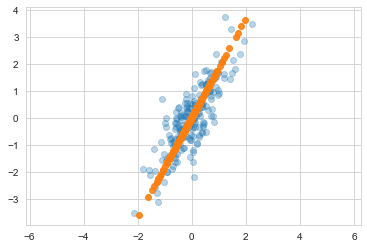

In [26]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.axis('equal')
plt.show()

In [27]:
X_new # 원데이터가 손실되어 1차원 데이터를 2차원으로 맞추기 위해 환원

array([[-1.74738944e-01, -2.94601664e-01],
       [ 2.44601800e-01,  4.75915049e-01],
       [ 2.02894329e-01,  3.99279750e-01],
       [ 1.83145359e+00,  3.39167232e+00],
       [ 9.37647831e-01,  1.74935093e+00],
       [-1.47081307e-01, -2.43782201e-01],
       [ 1.13237430e-01,  2.34539880e-01],
       [-5.00419054e-01, -8.93021855e-01],
       [-6.01331422e-01, -1.07844306e+00],
       [-1.38503144e+00, -2.51845091e+00],
       [-5.07465659e-01, -9.05969623e-01],
       [-1.30302040e-01, -2.12951174e-01],
       [ 2.53508309e-01,  4.92280294e-01],
       [ 3.39242051e-01,  6.49811566e-01],
       [ 1.66362396e-03,  2.95288405e-02],
       [ 1.62139294e+00,  3.00569684e+00],
       [-5.35082522e-01, -9.56714165e-01],
       [ 2.51614414e-01,  4.88800361e-01],
       [-9.00659492e-01, -1.62844275e+00],
       [ 1.82254578e-01,  3.61355286e-01],
       [ 9.30753600e-01,  1.73668314e+00],
       [-1.46696469e+00, -2.66899898e+00],
       [-1.27680958e-01, -2.08135073e-01],
       [-5.

### 실습 - Iris data

In [31]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target

iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 특성 4개를 한번에 확인하기는 어렵다

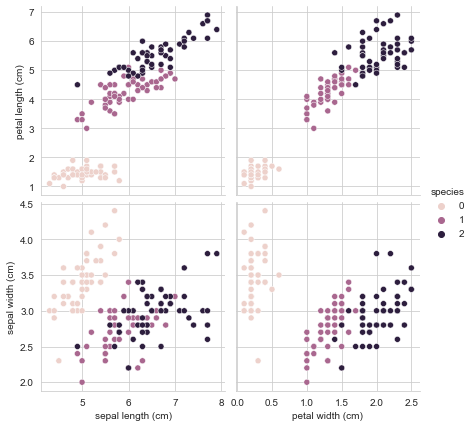

In [32]:
sns.pairplot(iris_pd, hue='species', height=3,
             x_vars=['sepal length (cm)', 'petal width (cm)'],
             y_vars=['petal length (cm)', 'sepal width (cm)']);

#### Scaler 적용

In [34]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

#### pca결과를 return하는 함수 생성

In [35]:
def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

#### return값 확인

In [36]:
iris_pca, pca = get_pca_data(iris_ss, 2)
iris_pca.shape

(150, 2)

In [37]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [38]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [43]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

#### 간단한 4개의 특성을 2개의 특성으로 정리

In [40]:
# pca 결과를 pandas로 정리
def get_pd_from_pca(pca_data, cols=['pca_component_1', 'pca_component_2']):
    return pd.DataFrame(pca_data, columns=cols)

In [41]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head(3)

,pca_component_1,pca_component_2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


#### 두 개의 특성을 시각화

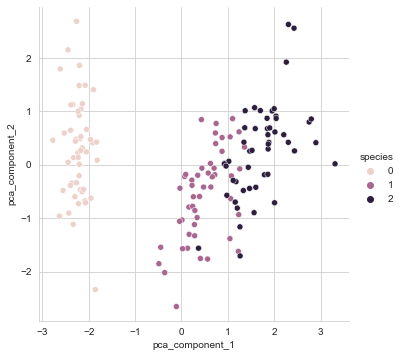

In [42]:
sns.pairplot(iris_pd_pca, hue='species', height=5,
            x_vars=['pca_component_1'], y_vars=['pca_component_2']);

In [45]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

#### 4개 특성을 모두 사용해서 randomforest에 적용하면

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)
    
    print('Score: ', np.mean(scores_rf))

rf_scores(iris_ss, iris.target)

Score:  0.96


#### 이번에는 2개의 특성만 적용했을 때

In [47]:
pca_X = iris_pd_pca[['pca_component_1', 'pca_component_2']]

rf_scores(pca_X, iris.target)

Score:  0.9066666666666666


### 실습 - Wine data

In [48]:
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, sep=',', index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


#### 와인 색상 분류

In [49]:
wine_y = wine['color']
wine_X = wine.drop(['color'], axis=1)
wine_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### StandardScaler 적용

In [50]:
wine_ss = StandardScaler().fit_transform(wine_X)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

#### 2개의 주성분으로 줄이는 건 데이터의 50%가 되지 않음

In [51]:
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
pca_wine.shape

(6497, 2)

In [52]:
def print_variance_ratio(pca):
    print('variance_ratio: ', pca.explained_variance_ratio_)
    print('sum of variance_ratio: ', np.sum(pca.explained_variance_ratio_))

In [53]:
print_variance_ratio(pca)

variance_ratio:  [0.25346226 0.22082117]
sum of variance_ratio:  0.4742834274323615


#### 시각화


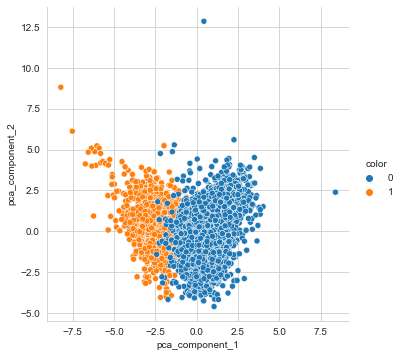

In [54]:
pca_columns = ['pca_component_1', 'pca_component_2']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_columns)
pca_wine_pd['color'] = wine_y.values

sns.pairplot(pca_wine_pd, hue='color', height=5,
            x_vars=['pca_component_1'], y_vars=['pca_component_2']);

#### RandomForest에 적용했을 때 원데이터와 큰 차이가 없다

In [55]:
rf_scores(wine_ss, wine_y)

Score:  0.9935352638124


In [56]:
pca_X = pca_wine_pd[['pca_component_1', 'pca_component_2']]
rf_scores(pca_X, wine_y)

Score:  0.981067803635933


#### 주성분 3개로 표현해달라고 했더니, 61%이상을 표현할 수 있다

In [57]:
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print_variance_ratio(pca)

cols = ['pca_1', 'pca_2', 'pca_3']
pca_wine_pd = get_pd_from_pca(pca_wine, cols=cols)

pca_X = pca_wine_pd[cols]
rf_scores(pca_X, wine_y)

variance_ratio:  [0.25346226 0.22082117 0.13679223]
sum of variance_ratio:  0.6110756621838709
Score:  0.9832236631728548


#### 주성분 3개로 표현한 것을 정리

In [58]:
pca_wine_plot = pca_X
pca_wine_plot['color'] = wine_y.values
pca_wine_plot.head()

,pca_1,pca_2,pca_3,color
0,-3.348438,0.568926,-2.727386,1
1,-3.228595,1.197335,-1.998904,1
2,-3.237468,0.952580,-1.746578,1
3,-1.672561,1.600583,2.856552,1
4,-3.348438,0.568926,-2.727386,1


#### 3D로 시각화

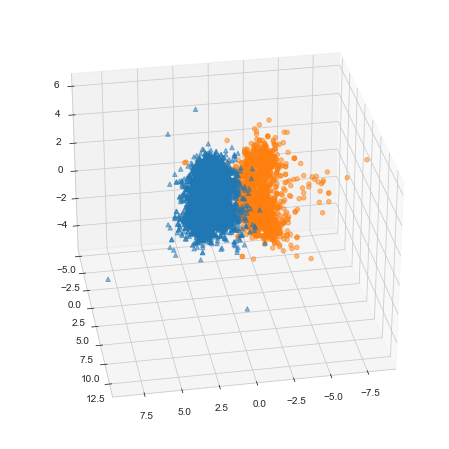

In [59]:
from mpl_toolkits.mplot3d import Axes3D

markers = ['^', 'o']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, marker in enumerate(markers):
    x_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_1']
    y_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_2']
    z_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_3']
    
    ax.scatter(x_axis_data, y_axis_data, z_axis_data,
              s=20, alpha=0.5, marker=marker)
    
ax.view_init(30, 80)
plt.show()

#### plotly로 시각화

In [61]:
import plotly.express as px

fig = px.scatter_3d(pca_wine_plot,
                   x='pca_1', y='pca_2', z='pca_3',
                   color='color', symbol='color',
                   opacity=0.4)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()